In [1]:
import anndata as ad
import os
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns

## Load data

In [2]:
data_path = '/data/hadjantalab/lucas/atlas/data'

In [3]:
file_path = os.path.join(data_path, 'adata.h5ad')
adata = ad.read_h5ad(file_path)
adata

AnnData object with n_obs × n_vars = 535935 × 8342
    obs: 'batch', 'stage', 'sample', 'covariate_composite', 'celltype_nowotschin', 'celltype_rosshandler', 'celltype_pijuansala', 'nowotschin_cluster', 'rosshandler_somite_count', 'rosshandler_anatomy', 'rosshandler_phase', 'rosshandler_S_score', 'rosshandler_G2M_score', 'rosshandler_louvain', 'rosshandler_leiden', 'annotation', 'mt-Atp6', 'mt-Atp8', 'mt-Co1', 'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4', 'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'
    var: 'highly_variable'
    uns: 'log1p'
    layers: 'log_normalized', 'raw_counts'

## Colormap celltype_extended_atlas

In [4]:
## colormap initially created by luke harland and bart theeweus for the rosshandler publication, then expanded by me

colormap_rosshandler = {
"Epiblast" : "#635547",
"Primitive Streak" : "#DABE99",
"Caudal epiblast" : "#9e6762",
"PGC" : "#FACB12",
"Anterior Primitive Streak" : "#c19f70",
"Node":"#153b3d",
"Notochord" : "#0F4A9C",
"Gut tube" : "#EF5A9D",
"Hindgut" : "#F397C0",
"Midgut" : "#ff00b2",
"Foregut" : "#ffb7ff",
"Pharyngeal endoderm":"#95e1ff",
"Thyroid primordium":"#97bad3",
"Nascent mesoderm" : "#C594BF",
"Intermediate mesoderm" : "#139992",
"Caudal mesoderm" : "#3F84AA",
"Lateral plate mesoderm" : "#F9DFE6",
"Limb mesoderm" : "#e35f82",
"Forelimb" : "#d02d75",
"Kidney primordium" : "#e85639",
"Presomitic mesoderm":"#5581ca",#"#0000ff",#blue
"Somitic mesoderm" : "#005579",
"Posterior somitic tissues" : "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" : "#8DB5CE",
"Cranial mesoderm" : "#456722",#"#006400",#darkgreen
"Anterior somitic tissues": "#d5e839",
"Sclerotome" : "#e3cb3a",#"#ffff00",#yellow
"Dermomyotome" : "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" : "#C9EBFB",
"Cardiopharyngeal progenitors" : "#556789",
"Anterior cardiopharyngeal progenitors":"#683ed8",
"Allantois" : "#532C8A",
"Mesenchyme" : "#cc7818",
"YS mesothelium" : "#ff7f9c",
"Epicardium":"#f79083",
"Embryo proper mesothelium" : "#ff487d",
"Cardiopharyngeal progenitors FHF":"#d780b0",
"Cardiomyocytes FHF 1":"#a64d7e",
"Cardiomyocytes FHF 2":"#B51D8D",
"Cardiopharyngeal progenitors SHF":"#4b7193",
"Cardiomyocytes SHF 1":"#5d70dc",
"Cardiomyocytes SHF 2":"#332c6c",
"Haematoendothelial progenitors" : "#FBBE92",
"Blood progenitors" : "#6c4b4c",
"Erythroid" : "#C72228",
"Chorioallantoic-derived erythroid progenitors":"#E50000",
"Megakaryocyte progenitors":"#e3cb3a",
"MEP":"#EF4E22",
"EMP":"#7c2a47",
"YS endothelium":"#ff891c",
"YS mesothelium-derived endothelial progenitors":"#AE3F3F",
"Allantois endothelium":"#2f4a60",
"Embryo proper endothelium":"#90e3bf",
"Venous endothelium":"#bd3400",
"Endocardium":"#9d0049",
"NMPs_Mesoderm-biased" : "#89c1f5",
"NMPs" : "#8EC792",
"Ectoderm" : "#ff675c",
"Optic vesicle" : "#bd7300",
"Ventral forebrain progenitors":"#a0b689",
"Early dorsal forebrain progenitors":"#0f8073",
"Late dorsal forebrain progenitors":"#7a9941",
"Midbrain_Hindbrain boundary":"#8ab3b5",
"Midbrain progenitors":"#9bf981",
"Dorsal midbrain neurons":"#12ed4c",
"Ventral hindbrain progenitors":"#7e907a",
"Dorsal hindbrain progenitors":"#2c6521",
"Hindbrain floor plate":"#bf9da8",
"Hindbrain neural progenitors":"#59b545",
"Neural tube":"#233629",
"Migratory neural crest":"#4a6798",
"Branchial arch neural crest":"#bd84b0",
"Frontonasal mesenchyme":"#d3b1b1",
"Spinal cord progenitors":"#6b2035",
"Dorsal spinal cord progenitors":"#e273d6",
"Non-neural ectoderm" : "#f7f79e",
"Surface ectoderm" : "#fcff00",
"Epidermis" : "#fff335",
"Limb ectoderm" : "#ffd731",
"Amniotic ectoderm" : "#dbb400",
"Placodal ectoderm" : "#ff5c00",
"Otic placode":"#f1a262",
"Otic neural progenitors":"#00b000",
"Visceral endoderm" : "#F6BFCB",
"ExE endoderm" : "#7F6874",
"ExE ectoderm" : "#989898",
"Parietal endoderm" : "#1A1A1A", 
"Endotome" : "#ca9161", # random for the moment
"unknown" : "#0173b2", # random for the moment
}

#adata.uns['colors_celltype'] = [ colormap_rosshandler[cat] for cat in adata.obs['celltype_extended_atlas'].cat.categories]
adata.uns['colormap_rosshandler'] = colormap_rosshandler

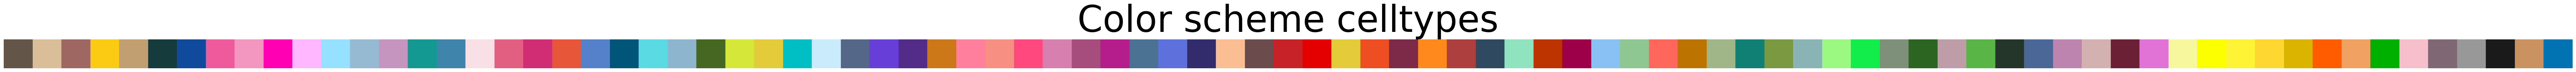

In [5]:
colormap = adata.uns['colormap_rosshandler']

num_colors = len(colormap.values())

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(num_colors, 1))

# Create a horizontal bar for each color
for i, hex_color in enumerate(colormap.values()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=hex_color))

# Set limits and remove axes
ax.set_xlim(0, num_colors)
ax.set_ylim(0, 1)
plt.title('Color scheme celltypes', fontsize = 70)
ax.axis('off')

plt.show()

## COLORMAP ANNOTATION

In [6]:
colormap_annotation = {
"Epiblast" : "#635547",
"Primitive Streak" : "#DABE99",
"Caudal epiblast" : "#9e6762",
"PGC" : "#FACB12",
"Anterior Primitive Streak" : "#c19f70",
"Node":"#153b3d",
"Notochord" : "#0F4A9C",
"Gut tube" : "#EF5A9D",
"Hindgut" : "#F397C0",
"Midgut" : "#ff00b2",
"Foregut" : "#ffb7ff",
"Pharyngeal endoderm":"#95e1ff",
"Thyroid primordium":"#97bad3",
"Nascent mesoderm" : "#C594BF",
"Intermediate mesoderm" : "#139992",
"Caudal mesoderm" : "#3F84AA",
"Lateral plate mesoderm" : "#F9DFE6",
"Limb mesoderm" : "#e35f82",
"Forelimb" : "#d02d75",
"Kidney primordium" : "#e85639",
"Presomitic mesoderm":"#5581ca",#"#0000ff",#blue
"Somitic mesoderm" : "#005579",
"Posterior somitic tissues" : "#5adbe4",#"#40e0d0",#turquoise
"Paraxial mesoderm" : "#8DB5CE",
"Cranial mesoderm" : "#456722",#"#006400",#darkgreen
"Anterior somitic tissues": "#d5e839",
"Sclerotome" : "#ffff00",#"#ffff00",#yellow
"Dermomyotome" : "#00BFC4",#"#a52a2a",#brown
"Pharyngeal mesoderm" : "#C9EBFB",
"Cardiopharyngeal progenitors" : "#556789",
"Anterior cardiopharyngeal progenitors":"#683ed8",
"Allantois" : "#532C8A",
"Mesenchyme" : "#cc7818",
"YS mesothelium" : "#ff7f9c",
"Epicardium":"#f79083",
"Embryo proper mesothelium" : "#ff487d",
"Cardiopharyngeal progenitors FHF":"#d780b0",
"Cardiomyocytes FHF 1":"#a64d7e",
"Cardiomyocytes FHF 2":"#B51D8D",
"Cardiopharyngeal progenitors SHF":"#4b7193",
"Cardiomyocytes SHF 1":"#5d70dc",
"Cardiomyocytes SHF 2":"#332c6c",
"Haematoendothelial progenitors" : "#FBBE92",
"Blood progenitors" : "#6c4b4c",
"Erythroid" : "#C72228",
"Chorioallantoic-derived erythroid progenitors":"#E50000",
"Megakaryocyte progenitors":"#e3cb3a",
"MEP":"#EF4E22",
"EMP":"#7c2a47",
"YS endothelium":"#ff891c",
"YS mesothelium-derived endothelial progenitors":"#AE3F3F",
"Allantois endothelium":"#2f4a60",
"Embryo proper endothelium":"#90e3bf",
"Venous endothelium":"#bd3400",
"Endocardium":"#9d0049",
"NMPs_Mesoderm-biased" : "#89c1f5",
"NMPs" : "#8EC792",
"Ectoderm" : "#ff675c",
"Optic vesicle" : "#bd7300",
"Ventral forebrain progenitors":"#a0b689",
"Early dorsal forebrain progenitors":"#0f8073",
"Late dorsal forebrain progenitors":"#7a9941",
"Midbrain_Hindbrain boundary":"#8ab3b5",
"Midbrain progenitors":"#9bf981",
"Dorsal midbrain neurons":"#12ed4c",
"Ventral hindbrain progenitors":"#7e907a",
"Dorsal hindbrain progenitors":"#2c6521",
"Hindbrain floor plate":"#bf9da8",
"Hindbrain neural progenitors":"#59b545",
"Neural tube":"#233629",
"Migratory neural crest":"#4a6798",
"Branchial arch neural crest":"#bd84b0",
"Frontonasal mesenchyme":"#d3b1b1",
"Spinal cord progenitors":"#6b2035",
"Dorsal spinal cord progenitors":"#e273d6",
"Non-neural ectoderm" : "#f7f79e",
"Surface ectoderm" : "#fcff00",
"Epidermis" : "#fff335",
"Limb ectoderm" : "#ffd731",
"Amniotic ectoderm" : "#dbb400",
"Placodal ectoderm" : "#ff5c00",
"Otic placode":"#f1a262",
"Otic neural progenitors":"#00b000",
"Visceral endoderm" : "#F6BFCB",
"ExE endoderm" : "#7F6874",
"ExE ectoderm" : "#989898",
"Parietal endoderm" : "#1A1A1A", 
"Endotome" : "#ca9161",
"XX-to-be-determined" : "#0173b2", 
'Blood':'#228B22',
'DE':'#FFD700',
'EPI':'#8B0000',
'Endothelial':'#8A2BE2',
'ExE':'#FF6347',
'GermCells':'#00CED1',
'Gut tube:DE:Colon':'#4682B8',
'Gut tube:DE:Liver':'#DAA520',
'Gut tube:DE:Lung':'#9400D3',
'Gut tube:DE:Pancreas':'#00FF7F',
'Gut tube:DE:Small int':'#1E90FF',
'Gut tube:DE:Thymus':'#7CFC00',
'Gut tube:DE:Thyroid':'#FF4500',
'Gut tube:VE:Colon':'#DC143C',
'Gut tube:VE:Liver':'#D2691E',
'Gut tube:VE:Lung':'#006400',
'Gut tube:VE:Pancreas':'#2E8B57',
'Gut tube:VE:Small int':'#808000',
'Gut tube:VE:Thymus':'#DB7093',
'Gut tube:VE:Thyroid':'#FF69B4',
'ICM':'#4B0082',
'Mes':'#F4A460',
'Midline':'#40E0D0',
'ParE':'#D8BFD8',
'PrE':'#BC8F8F',
'TE':'#4682B4',
'VE':'#5F9EA0',
'YsE':'#B0E0E6',
'emVE':'#FFA07A',
'exVE':'#FF1493'
}
adata.uns['colormap_annotation'] = colormap_annotation

In [7]:
additional_colors = [
    '#228B22', '#FFD700', '#8B0000', '#8A2BE2', '#FF6347', '#00CED1', '#4682B8', 
    '#DAA520', '#9400D3', '#00FF7F', '#1E90FF', '#7CFC00', '#FF4500', '#DC143C', 
    '#D2691E', '#006400', '#2E8B57', '#808000', '#DB7093', '#FF69B4', '#4B0082', 
    '#F4A460', '#40E0D0', '#D8BFD8', '#BC8F8F', '#4682B4', '#5F9EA0', '#B0E0E6', 
    '#FFA07A', '#FF1493'
]


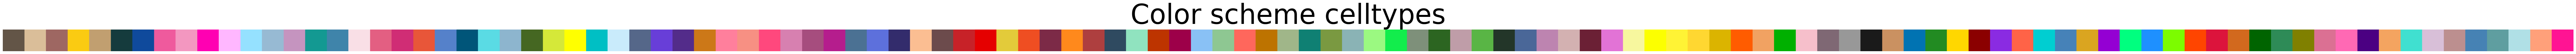

In [8]:
colormap = adata.uns['colormap_annotation']

num_colors = len(colormap.values())

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(num_colors, 1))

# Create a horizontal bar for each color
for i, hex_color in enumerate(colormap.values()):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=hex_color))

# Set limits and remove axes
ax.set_xlim(0, num_colors)
ax.set_ylim(0, 1)
plt.title('Color scheme celltypes', fontsize = 70)
ax.axis('off')

plt.show()

## Colormap stage

In [10]:
colormap_stage = {
    "E3.5":"#b0ac76", 
    "E4.5":"#e1d73f", 
    "E5.5":"#aacd83", 
    "E6.5":"#56b4e9", 
    "E6.75":"#0173b2",
    "E7.0":"#7d8351", 
    "E7.25":"#c29113", 
    "E7.5":"#479951", 
    "E7.75":"#378e56", 
    "E8.0":"#ad6a16", 
    "E8.25":"#d26847", 
    "E8.5":"#cd76b0", 
    "E8.75":"#cb848e", 
    "E9.0":"#cd9369", 
    "E9.25":"#e9a4b3", 
    "E9.5":"#e8aad5", 
}

symbolmap_plotly_stage = {
    "E3.5": "diamond",
    "E4.5": "triangle-down",
    "E5.5": "triangle-left",
    "E6.5": "triangle-right",
    "E6.75": "x",
    "E7.0": "hexagon",
    "E7.25": "hexagon2",
    "E7.5": "octagon",
    "E7.75": "pentagon",
    "E8.0": "bowtie",
    "E8.25": "star-triangle-up",
    "E8.5": "star-triangle-down",
    "E8.75": "star-square",
    "E9.0": "star-diamond",
    "E9.25": "hourglass",
    "E9.5": "arrow",
}

symbolmap_stage = {
    "E3.5":"1", 
    "E4.5":"2", 
    "E5.5":"3", 
    "E6.5":"4", 
    "E6.75":8,
    "E7.0":9, 
    "E7.25":10, 
    "E7.5":11, 
    "E7.75":"8", 
    "E8.0":"p", 
    "E8.25":"P", 
    "E8.5":"X", 
    "E8.75":"D", 
    "E9.0":"d", 
    "E9.25":"+", 
    "E9.5":"x", 
}



## saving our maps in adata
adata.uns['colormap_stage'] = colormap_stage
adata.uns['symbolmap_stage'] = symbolmap_stage
adata.uns['symbolmap_plotly_stage'] = symbolmap_plotly_stage

#adata.obs['colormap_stage'] = [colormap_stage[key] for key in adata.obs['stage']]



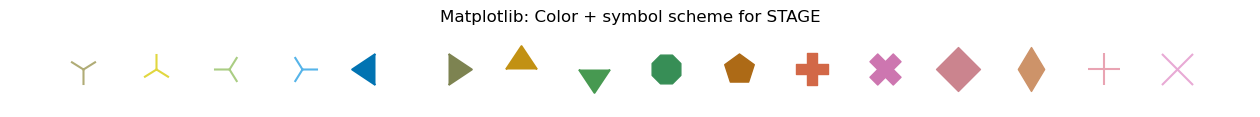

In [11]:
# diplaying the choice of colors
voi = colormap_stage

num_loop = len(voi)

#Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(num_loop, 1))

# Create a horizontal bar for each color
for i, key in enumerate(voi.keys()):
    ax.scatter(i, 0, color=voi[key], marker = symbolmap_stage[key], s = 500)

# Set limits and remove axes
ax.set_xlim(-1, num_loop)

ax.set_ylim(-1, 1) 
ax.set_xticks(range(len(voi.keys())))
ax.set_xticklabels(voi.keys(), rotation = 90)
ax.axis('off')
plt.title('Matplotlib: Color + symbol scheme for STAGE')


plt.show()

In [12]:


## rendering checking which keys
pio.renderers.keys()
## setting a key for rendering
pio.renderers.default = "iframe_connected" ## for interactive
#pio.renderers.default = "notebook" ## for hmtl


# Example data (replace with your actual data)
colormap = adata.uns['colormap_stage']
symbolmap = adata.uns['symbolmap_plotly_stage']

# Extract keys, colors, and symbols
keys = list(colormap.keys())
colors = [colormap[key] for key in keys]
symbols = [symbolmap[key] for key in keys]

# Create a Plotly scatter plot
fig = go.Figure()

for i, key in enumerate(keys):
    fig.add_trace(go.Scatter(
        x=[i],
        y=[0],
        mode='markers',
        marker=dict(color=colors[i], symbol=symbols[i], size=20),
        text=key,
        hoverinfo='text'
    ))

# Customize the layout
fig.update_layout(
    xaxis=dict(
        tickvals=list(range(len(keys))),
        ticktext=keys,
        tickangle=90,
        range=[-1, len(keys)],
        showgrid=False
    ),
    yaxis=dict(
        range=[-1, 1],
        showticklabels=False,
        showgrid=False
    ),
    showlegend=False,
    height=200,
    width=800,
    margin=dict(l=20, r=20, t=50, b=20), 
    title = 'Plotly: color + symbol scheme for STAGE'
)

fig.show()


## Colormap batch

In [13]:
## colors chosen from seaborn colorblind palette

colormap_batch = {
    'pijuan-sala' : '#949494', 
    'rosshandler' : '#029e73', 
    'nowotschin' : '#0173b2', 
    'query' : '#e28f1f',
    'query_control' : '#c458b0'
}

symbolmap_batch = {
    'pijuan-sala' : 's', 
    'rosshandler' : 'o',
    'nowotschin' : '^', 
    'query' : '*', 
    'query_control' : '*'
}

symbolmap_plotly_batch = {
    'pijuan-sala' : 'square', 
    'rosshandler' : 'circle',
    'nowotschin' : 'triangle-up', 
    'query' : 'star', 
    'query_control' : 'star'
}

## saving our maps in adata

adata.uns['colormap_batch'] = colormap_batch
adata.uns['symbolmap_batch'] = symbolmap_batch
adata.uns['symbolmap_plotly_batch'] = symbolmap_plotly_batch

#adata.uns['colors_batch'] = [ colormap_batch[cat] for cat in adata.obs['batch'].cat.categories]
#adata.uns['symbols_batch'] = [ symbolmap_batch[cat] for cat in adata.obs['batch'].cat.categories]
#adata.uns['symbols_plotly_batch'] = [ symbolmap_plotly[cat] for cat in adata.obs['batch'].cat.categories]

#adata.obs['colormap_batch'] = [colormap_batch[key] for key in adata.obs['batch']]
#adata.obs['symbolmap_plotly_batch'] = [symbolmap_plotly_batch[key] for key in adata.obs['batch']]

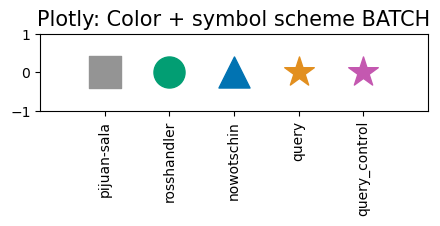

In [14]:
## diplaying the choice of colors
colormap = adata.uns['colormap_batch']
symbolmap = adata.uns['symbolmap_batch']

num_loop = len(colormap)

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(num_loop, 1))

# Create a horizontal bar for each color
for i, key in enumerate(colormap.keys()):
    ax.scatter(i, 0, color=colormap[key], marker = symbolmap[key], s = 500)

# Set limits and remove axes
ax.set_xlim(-1, num_loop)
ax.set_ylim(-1, 1)
ax.set_xticks(range(len(colormap.keys())))
ax.set_xticklabels(colormap.keys(), rotation = 90)
#ax.axis('off')
plt.title('Plotly: Color + symbol scheme BATCH', fontsize = 15)


plt.show()

## Save adata

In [15]:
data_path = '/data/hadjantalab/lucas/atlas/data'

In [16]:
%%time
## saving the complete object, it ain't that big
file_path = os.path.join(data_path, "adata.h5ad")
adata.write_h5ad(file_path)

CPU times: user 8.76 s, sys: 10.6 s, total: 19.4 s
Wall time: 33.7 s


## Interpolation of colors to derive new colors

In [17]:
## extracting colorblind palette and interpolating some more colors

from matplotlib.colors import LinearSegmentedColormap, to_hex

def extend_palette(base_colors, num_colors):
    """
    Extend a base color palette to the desired number of colors by interpolation.
    
    Parameters:
    - base_colors: List of base colors.
    - num_colors: The desired number of colors.
    
    Returns:
    - List of colors extended to the desired number.
    """
    cmap = LinearSegmentedColormap.from_list("extended_palette", base_colors, N=num_colors)
    extended_palette = [cmap(i) for i in range(num_colors)]
    return extended_palette

def convert_to_hex(color_palette): 
    hex_palette = [to_hex(color) for color in color_palette]
    return hex_palette

# Base colorblind palette from seaborn
base_palette = sns.color_palette("colorblind")



# Define the number of colors needed
voi = adata.obs['stage']
num_colors = len(set(voi))  # Example number of unique stages

# Generate the extended palette
extended_palette = extend_palette(base_palette, num_colors)

# convert to hex
extended_palette = convert_to_hex(extended_palette)